In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [13]:
import pandas_datareader as pdweb
from datetime import datetime

In [9]:
from __future__ import division

In [10]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [19]:
for stock in tech_list:
    globals()[stock]= pdweb.get_data_yahoo(stock,start,end)

In [25]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,98.326782,95.512067,96.907815,96.975157,1.567117e+08,96.690933
std,22.585071,22.084998,22.496995,22.317583,7.014231e+07,22.463118
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.298752,77.650625,78.318752,78.268124,1.089591e+08,77.834799
50%,95.677502,93.740002,94.277500,95.191250,1.377444e+08,94.856277
75%,118.754997,115.522501,117.127501,116.597498,1.870393e+08,116.541439
max,138.789993,134.339996,138.050003,136.690002,4.268848e+08,136.690002


In [26]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-01-13 to 2021-01-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

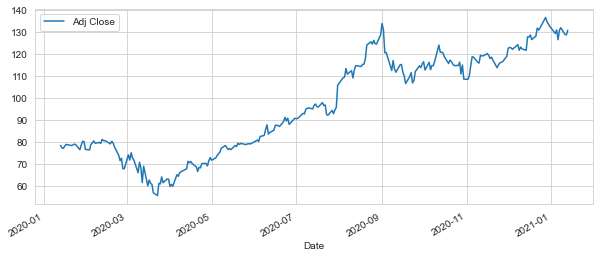

In [27]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

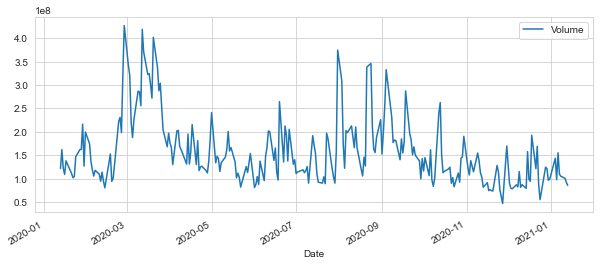

In [28]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [47]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

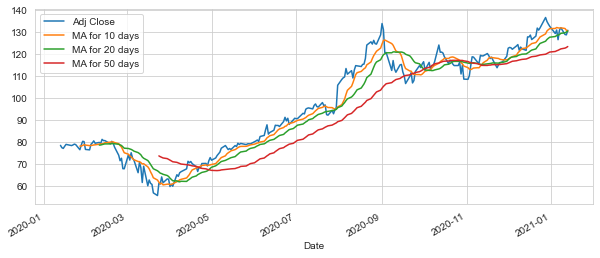

In [48]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

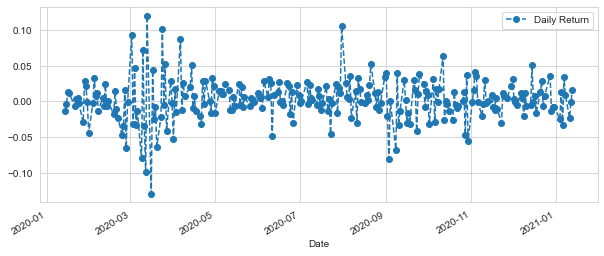

In [49]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True, linestyle='--',marker='o')

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

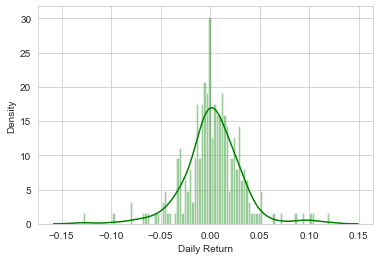

In [50]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

<AxesSubplot:>

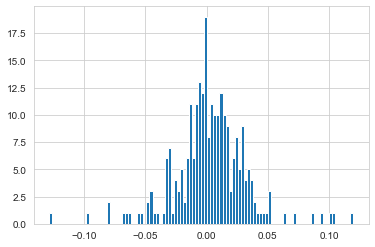

In [51]:
AAPL['Daily Return'].hist(bins=100)

In [53]:
closing_df = pdweb.get_data_yahoo(tech_list,start,end)['Adj Close']

In [54]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-13,78.561531,1439.229980,161.568405,1891.300049
2020-01-14,77.500702,1430.880005,160.430450,1869.439941
2020-01-15,77.168564,1439.199951,161.469452,1862.020020
2020-01-16,78.135223,1451.699951,164.428116,1877.939941
2020-01-17,79.000244,1480.390015,165.348358,1864.719971


In [55]:
tech_rts = closing_df.pct_change()

In [56]:
tech_rts.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969
2020-01-16,0.012527,0.008685,0.018323,0.008550
2020-01-17,0.011071,0.019763,0.005597,-0.007040


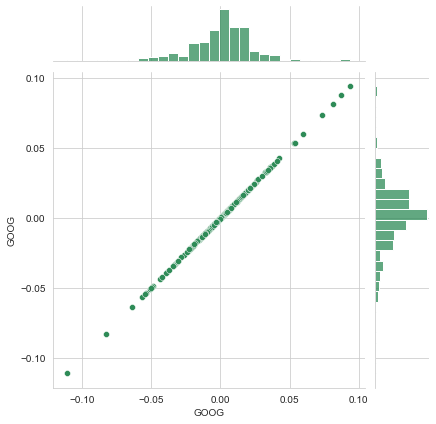

In [58]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rts,kind='scatter',color='seagreen')

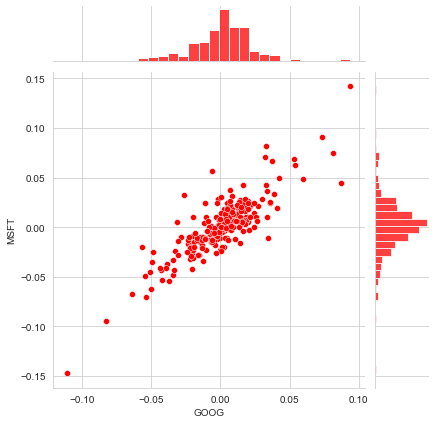

In [59]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rts,kind='scatter',color='red')

In [60]:
tech_rts.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969
2020-01-16,0.012527,0.008685,0.018323,0.008550
2020-01-17,0.011071,0.019763,0.005597,-0.007040


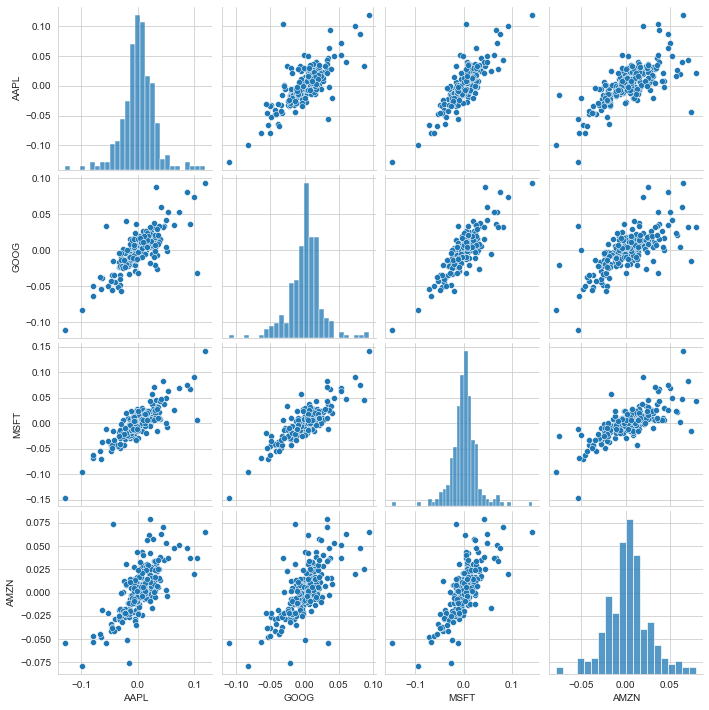

In [61]:
sns.pairplot(tech_rts.dropna())

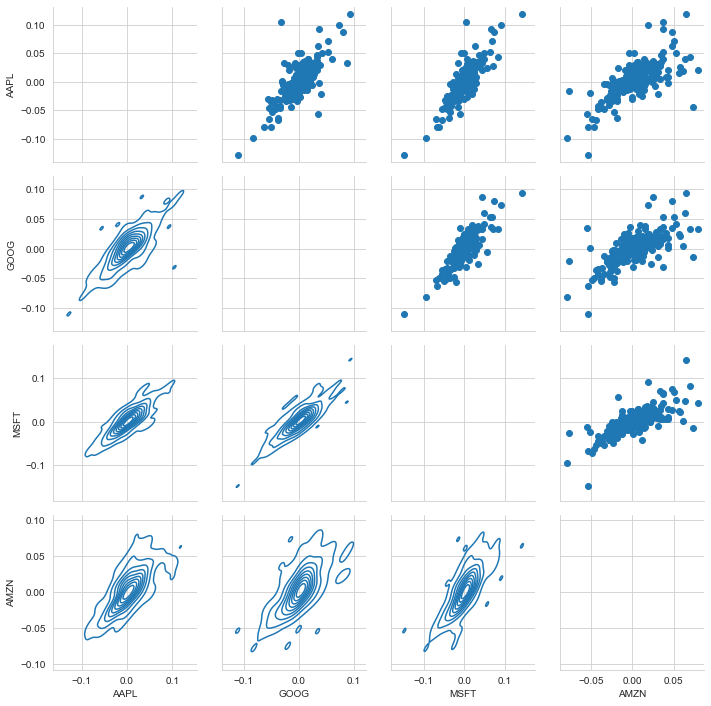

In [70]:
returns_fig = sns.PairGrid(tech_rts.dropna())

returns_fig.map_upper(plt.scatter)

returns_fig.map_lower(sns.kdeplot)

returns_fig.map_diag(plt.hist, bins=30)

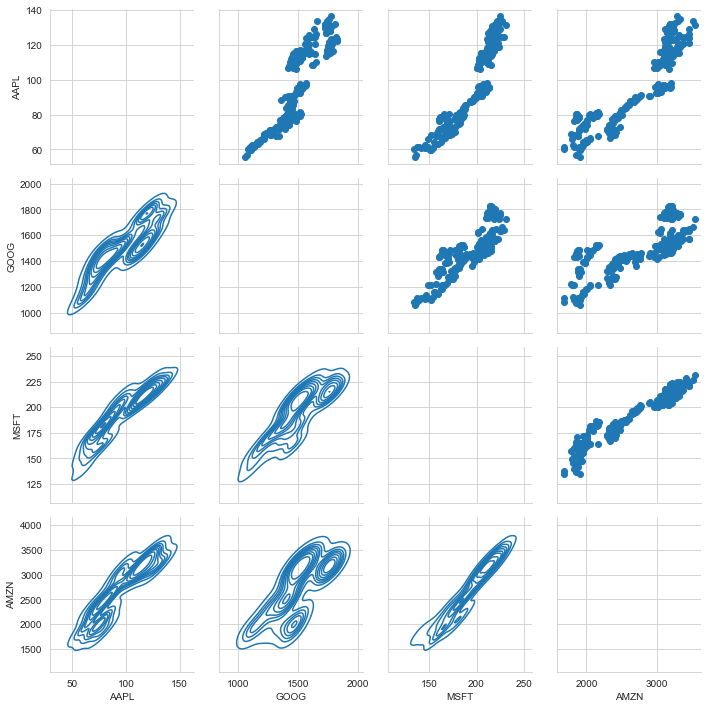

In [73]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter)

returns_fig.map_lower(sns.kdeplot)

returns_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

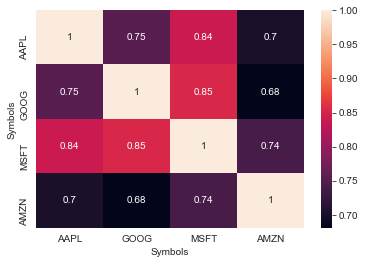

In [78]:
sns.heatmap(tech_rts.dropna().corr(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

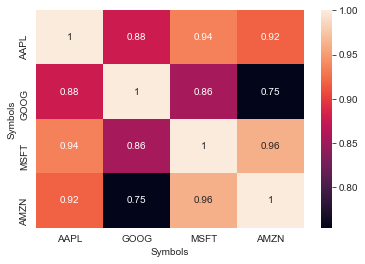

In [79]:
sns.heatmap(closing_df.corr(),annot=True)

In [80]:
#Risk Analysis
#Risk is the standard deviation of Daily returns. We compare it to "Expected Returns"
rts = tech_rts.dropna()

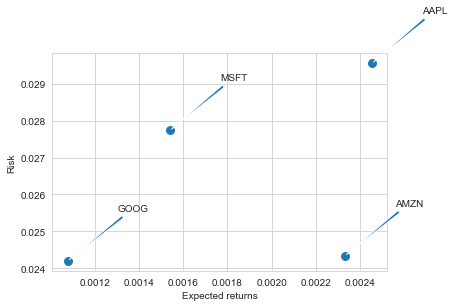

In [90]:
area = np.pi*20

plt.scatter(rts.mean(),rts.std(),s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rts.columns, rts.mean(), rts.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points',
        arrowprops = dict(arrowstyle = 'wedge'))

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

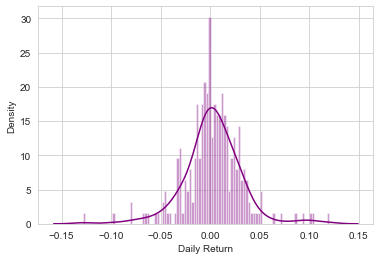

In [95]:
# Value at Risk "Bootstrap Method"
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [96]:
rts.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969
2020-01-16,0.012527,0.008685,0.018323,0.008550
2020-01-17,0.011071,0.019763,0.005597,-0.007040
2020-01-21,-0.006777,0.002709,-0.003591,0.014630


In [97]:
rts['AAPL'].quantile(0.05)

-0.04480978227807339

In [98]:
#Value at Risk "Monte Carlo Method (Geometric Brownian Motion)"

days = 365

dt = 1/days

mu = rts.mean()['GOOG']

sigma = rts.std()['GOOG']


In [102]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [100]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-13,1440.520020,1426.020020,1436.130005,1439.229980,1652300,1439.229980
2020-01-14,1441.800049,1428.369995,1439.010010,1430.880005,1558900,1430.880005
2020-01-15,1441.395020,1430.209961,1430.209961,1439.199951,1282700,1439.199951
2020-01-16,1451.989990,1440.920044,1447.439941,1451.699951,1173700,1451.699951
2020-01-17,1481.295044,1458.219971,1462.910034,1480.390015,2396200,1480.390015


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

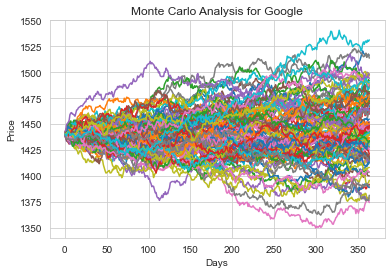

In [103]:
start_price = 1440.52
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [104]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    

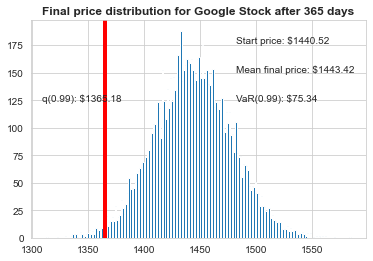

In [105]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');